#  Hands On: Data Exploration

# 1 Summarization


### Load the data set carIns final. It already has the imputation of missing values.


In [25]:
import pyreadr #Nos permite cargar RData de R en Python

### 1. Using the package dplyr, answer the following questions:

#### (a) Obtain the number of cars by bodyStyle.

In [26]:
import pandas as pd

In [27]:
# Carga el archivo .RData utilizando pyreadr
result = pyreadr.read_r('../datasets/carIns_final.RData')

# Accede a los datos cargados con la clave "carIns_final"
data = result['carIns_final']

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,...,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symb              205 non-null    int32   
 1   normLoss          205 non-null    int32   
 2   make              205 non-null    category
 3   fuelType          205 non-null    category
 4   aspiration        205 non-null    category
 5   nDoors            205 non-null    category
 6   bodyStyle         205 non-null    category
 7   driveWheels       205 non-null    category
 8   engineLocation    205 non-null    category
 9   wheelBase         205 non-null    float64 
 10  length            205 non-null    float64 
 11  width             205 non-null    float64 
 12  height            205 non-null    float64 
 13  curbWeight        205 non-null    int32   
 14  engineType        205 non-null    category
 15  nrCylinds         205 non-null    category
 16  engineSize        205 non-

In [31]:
# Obtenemos el numero de caros de bodyStyle
cars_bodyStyle = df['bodyStyle'].value_counts()

print(cars_bodyStyle)

bodyStyle
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


#### (b) Obtain the number of cars by bodyStyle and fuelType

In [32]:
# Numero de automóviles por bodyStyle y fuelType
cars_bodyStyle_fuelType = df.groupby(['bodyStyle', 'fuelType']).size()

print(cars_bodyStyle_fuelType)

bodyStyle    fuelType
convertible  diesel       0
             gas          6
hardtop      diesel       1
             gas          7
hatchback    diesel       1
             gas         69
sedan        diesel      15
             gas         81
wagon        diesel       3
             gas         22
dtype: int64


#### (c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.

In [33]:
# Se agrupa cityMpg por bodyStyle y se saca la media y se ordena de manera ascendente
#mean_cityMPgp = df.groupby(["cityMpg", "bodyStyle"]).mean().sort_values()

mean_cityMPgp = df.groupby('bodyStyle')['cityMpg'].agg(['mean'])

mean = mean_cityMPgp.sort_values(ascending = True,by=['mean'])
print('MEAN')
print(mean)

std_cityMPgp = df.groupby('bodyStyle')['cityMpg'].agg(['std'])

std = std_cityMPgp.sort_values(ascending = True,by=['std'])

print('\nSTD')
print(std)


MEAN
                  mean
bodyStyle             
convertible  20.500000
hardtop      21.625000
wagon        24.040000
sedan        25.322917
hatchback    26.314286

STD
                  std
bodyStyle            
convertible  3.391165
wagon        4.217819
hardtop      5.423165
sedan        6.599035
hatchback    7.169870


#### (d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.

In [34]:
import numpy as np

In [35]:
def iqr_func(x):
    """ This function calculate the iqr range given a data point value

    Args:
        x (int, float): Data Point value

    Returns:
        int, float: IQR
    """
    q3, q1 = np.percentile(x, [75, 25])
    return q3 - q1

In [36]:
quartile = df.groupby('bodyStyle')[['cityMpg','highwayMpg']].agg(['mean','std','median',iqr_func])
print(quartile)

               cityMpg                           highwayMpg                    
                  mean       std median iqr_func       mean       std median   
bodyStyle                                                                      
convertible  20.500000  3.391165   21.0     5.25  26.000000  4.289522   27.0  \
hardtop      21.625000  5.423165   23.0     7.00  27.250000  6.088631   27.5   
hatchback    26.314286  7.169870   26.0    12.00  32.171429  7.044314   31.5   
sedan        25.322917  6.599035   25.0    11.25  30.833333  7.174027   30.5   
wagon        24.040000  4.217819   24.0     5.00  28.720000  4.703899   29.0   

                      
            iqr_func  
bodyStyle             
convertible     3.00  
hardtop         5.00  
hatchback      11.75  
sedan          11.25  
wagon           7.00  


# 2 Visualization

## 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

In [37]:
import matplotlib.pyplot as plt 

#### (e) Show the relationship between the attributes cityMpg and highwayMpg

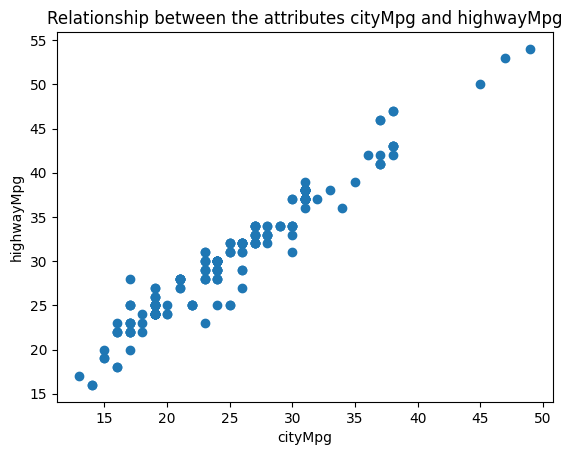

In [38]:
plt.scatter(df['cityMpg'], df['highwayMpg'])
plt.xlabel('cityMpg')
plt.ylabel('highwayMpg')
plt.title('Relationship between the attributes cityMpg and highwayMpg')
plt.show()

Mantienen una relacion lineal

#### (f) Show the distribution of cars by bodyStyle

In [40]:
import seaborn as sns

Text(0.5, 1.0, 'Show the distribution of cars by bodyStyle')

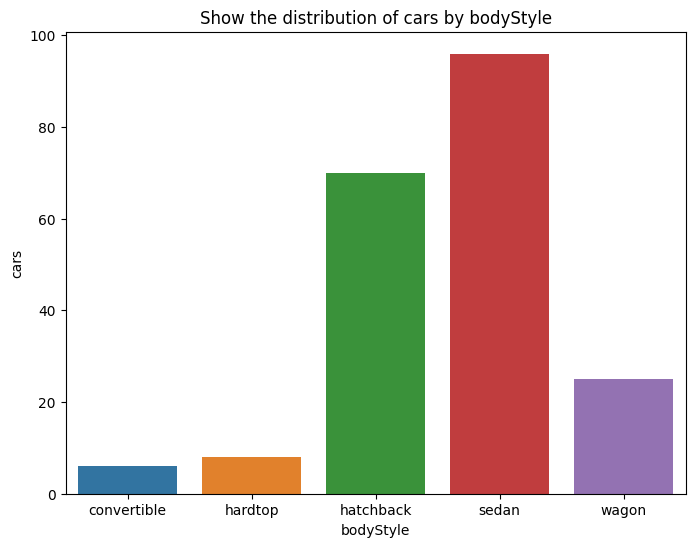

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bodyStyle')
plt.xlabel('bodyStyle')
plt.ylabel('cars')
plt.title('Show the distribution of cars by bodyStyle')

#### (g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

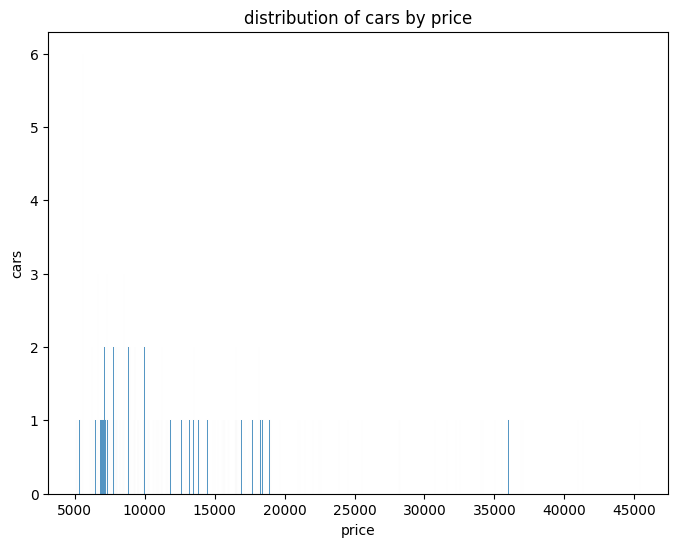

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins = 5000)
plt.xlabel('price')
plt.ylabel('cars')
plt.title('distribution of cars by price')
plt.show()

#### (h) Add the information of the density estimation to the previous graph.


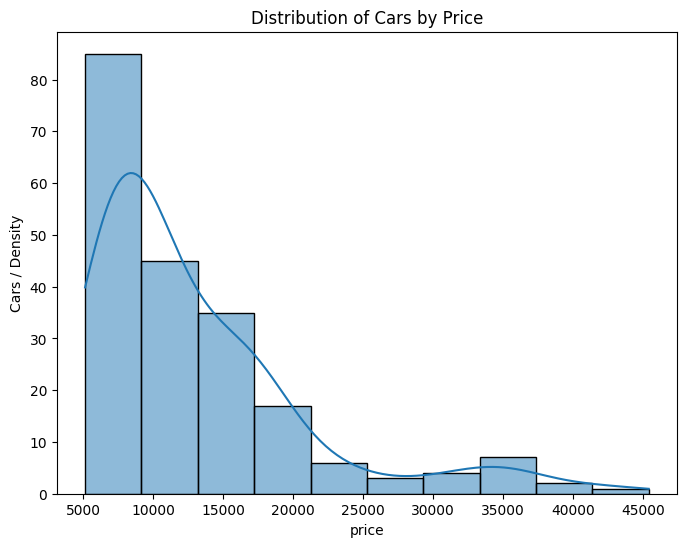

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', kde=True, bins=10)
plt.xlabel('price')
plt.ylabel('Cars / Density')
plt.title('Distribution of Cars by Price')
plt.show()

#### (i) Check (visually) if it is plausible to consider that price follows a normal distribution

In [46]:
import scipy.stats as stats

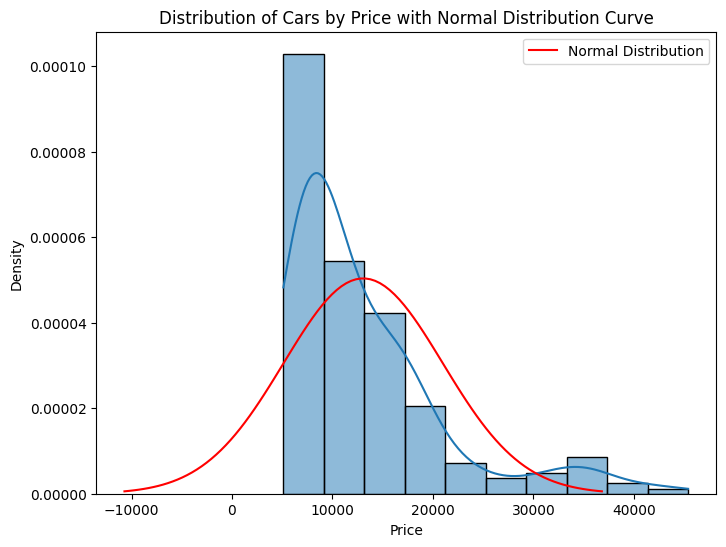

In [47]:
# Crear un histograma con estimación de densidad
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', kde=True, bins=10, stat='density')

# Superponer la curva de distribución normal
mu, sigma = np.mean(df['price']), np.std(df['price'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='Normal Distribution')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Cars by Price with Normal Distribution Curve')
plt.legend()
plt.show()

Se puede confundir que se obtiene una distribucion normal, pero esto no es asi debido a que la distribucion de los precios crece hacia la derecha

#### (j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip()

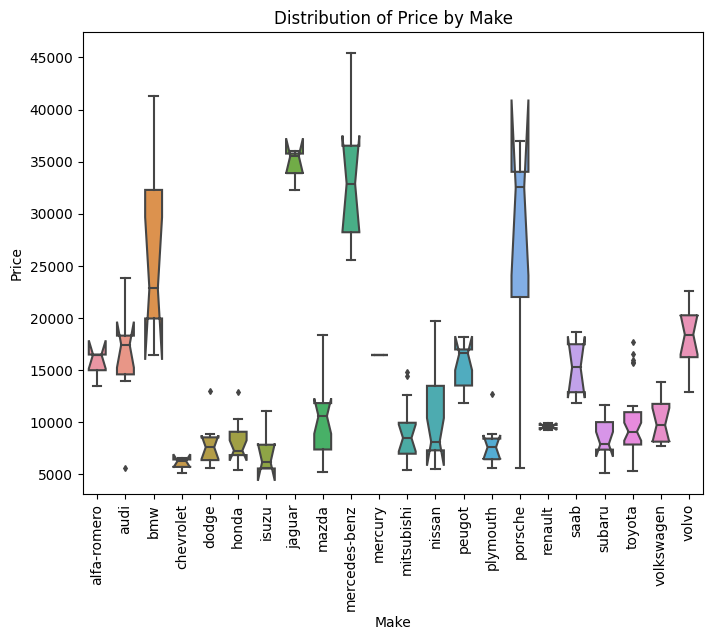

In [52]:
# Crea un diagrama de caja de la distribución del precio por marca
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x='make', y='price', width=0.6, linewidth=1.5, notch=True, fliersize=3)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Distribution of Price by Make')
plt.xticks(rotation=90)
plt.show()

#### (k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.

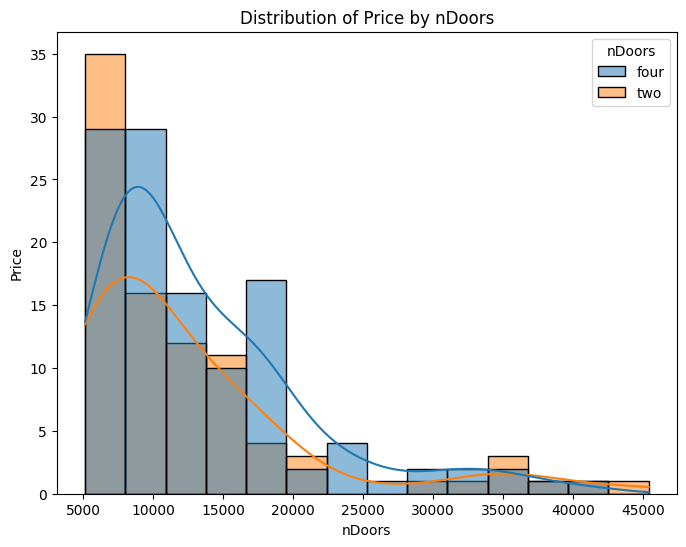

In [53]:
# Crea un diagrama de caja de la distribución del precio por marca
plt.figure(figsize=(8, 6))
ax = sns.histplot(data = df, x = 'price', hue = 'nDoors', kde = True)
plt.xlabel('nDoors')
plt.ylabel('Price')
plt.title('Distribution of Price by nDoors')
plt.show()

#### (l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

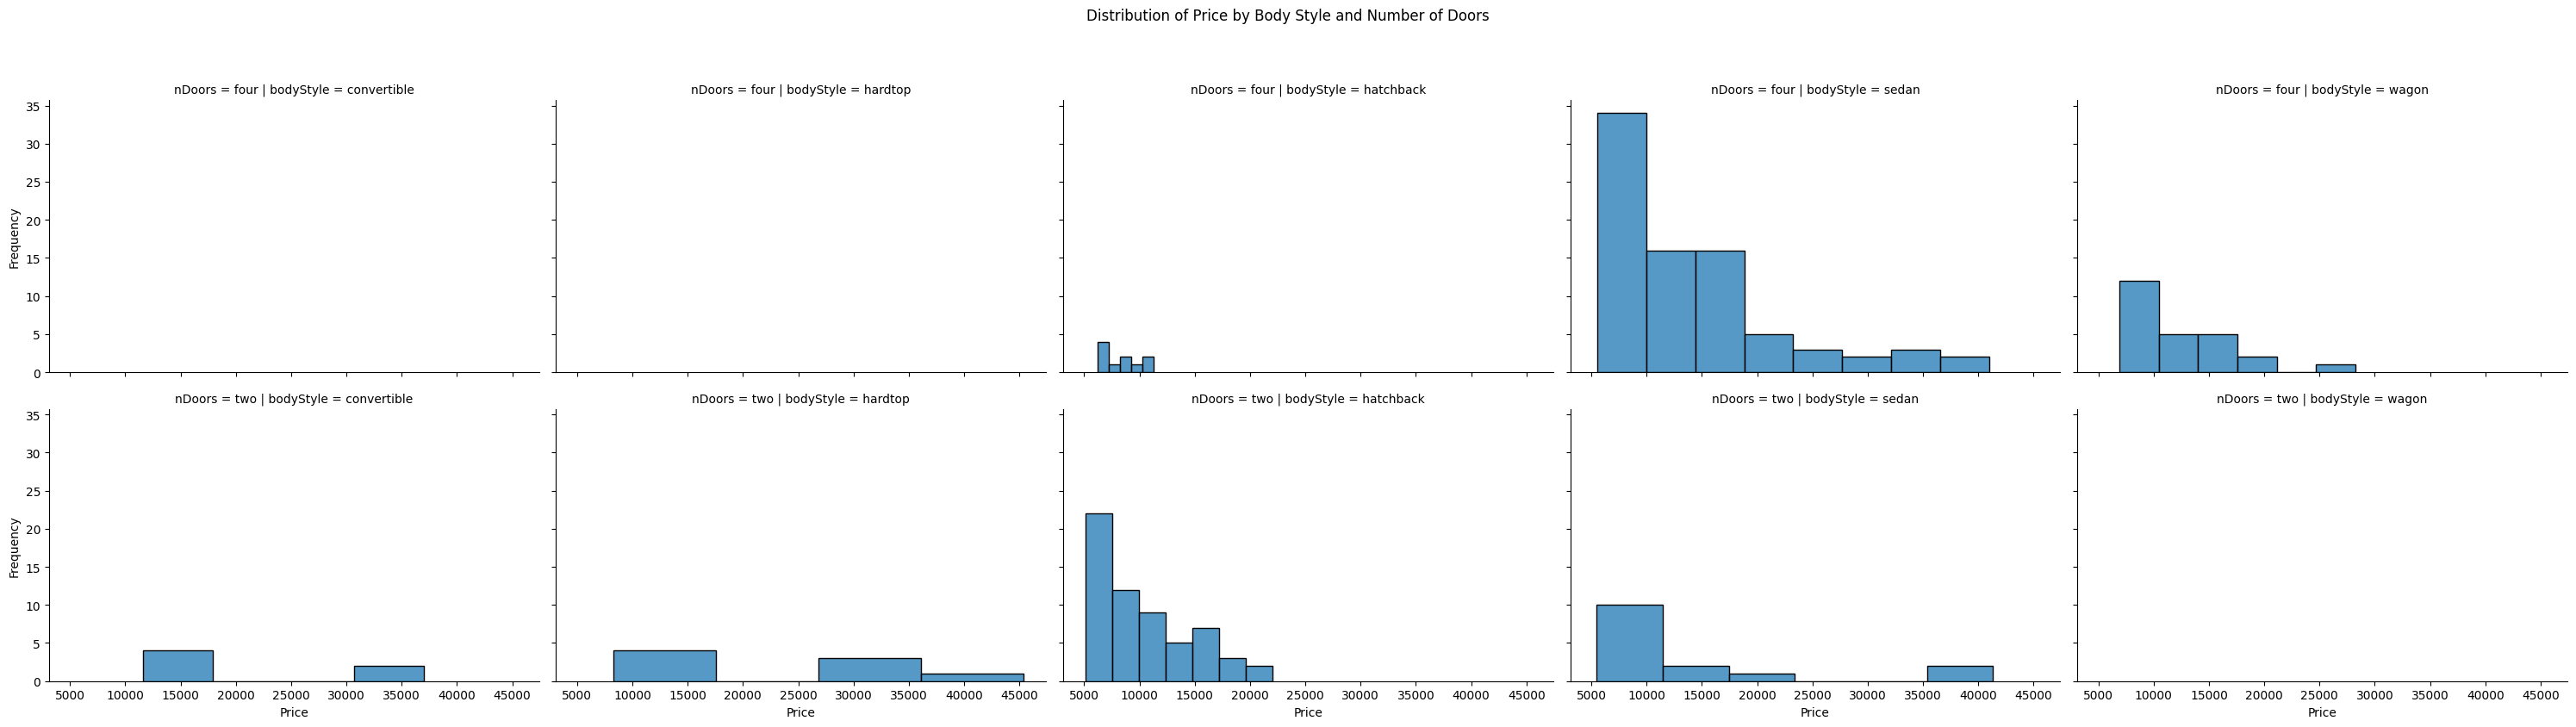

In [56]:
dist_bodyStyle_nDoors = sns.FacetGrid(df, col='bodyStyle', row='nDoors', height=4, aspect=1.5)
dist_bodyStyle_nDoors.map(sns.histplot, 'price')
dist_bodyStyle_nDoors.set_axis_labels('Price', 'Frequency')
dist_bodyStyle_nDoors.fig.suptitle('Distribution of Price by Body Style and Number of Doors', y=1.05)
plt.tight_layout()
plt.show()

#### (m) Add the parameter scales="free_y" to the facet function in the previous graph.

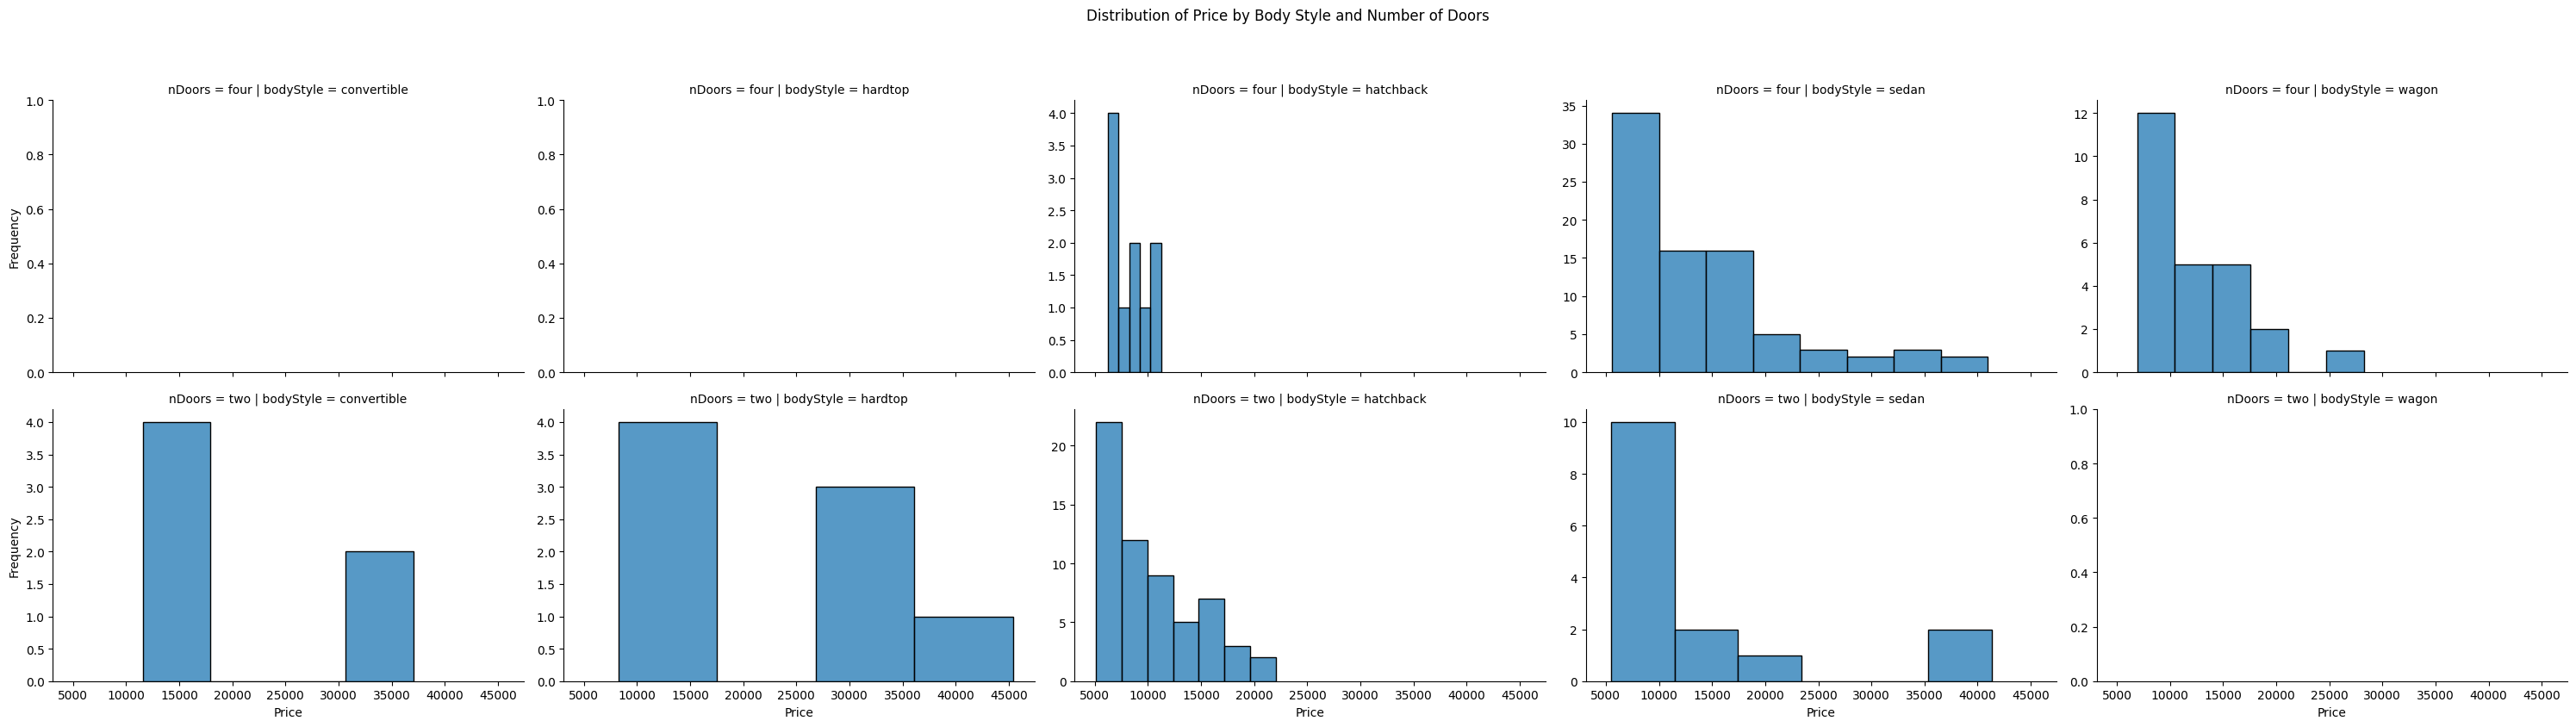

In [57]:
dist_bodyStyle_nDoors = sns.FacetGrid(df, col='bodyStyle', row='nDoors', height=4, aspect=1.5, sharey=False)
dist_bodyStyle_nDoors.map(sns.histplot, 'price')
dist_bodyStyle_nDoors.set_axis_labels('Price', 'Frequency')
dist_bodyStyle_nDoors.fig.suptitle('Distribution of Price by Body Style and Number of Doors', y=1.05)
plt.tight_layout()
plt.show()